In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

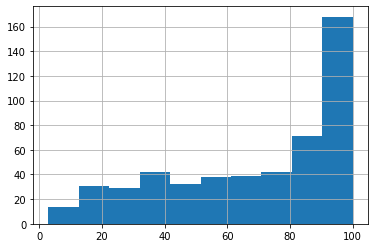

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['MEDV'] = boston.target
bos.describe
bos['AGE'].hist()

## Fit a linear regressor to the data as a baseline.  

In [3]:
train_set = bos.sample(frac=0.7, random_state=100)
test_set = bos[~bos.isin(train_set)].dropna()

In [4]:
X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

In [5]:
reg = LinearRegression(normalize=True).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

0.7478284701218886
[-1.35456753e-01  5.48606010e-02  5.46611167e-02  3.57648807e+00
 -2.01163242e+01  3.96567027e+00  1.33685712e-02 -1.48716658e+00
  2.99295349e-01 -9.83868843e-03 -9.45023886e-01  6.45207267e-03
 -5.77572297e-01]
36.0793476882823
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


What is the loss and what are the goodness of fit parameters?

In [6]:
print("The loss of the model is {}.".format(reg.score(X_train, Y_train)))
for k, v in reg.get_params().items():
    print("Goodness of fit parameter {} has a value of {}".format(k,v))

The loss of the model is 0.7478284701218886.
Goodness of fit parameter copy_X has a value of True
Goodness of fit parameter fit_intercept has a value of True
Goodness of fit parameter n_jobs has a value of None
Goodness of fit parameter normalize has a value of True


In [7]:
Y_pred = reg.predict(X_test)

orig_mae = mean_absolute_error(Y_test,Y_pred)
orig_mse = mean_squared_error(Y_test,Y_pred)
orig_rmse_val = rmse(Y_test,Y_pred)
orig_r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%orig_mae)
print("MSE:  %.3f"%orig_mse)
print("RMSE:  %.3f"%orig_rmse_val)
print("R2:  %.3f"%orig_r2)

MAE: 3.605
MSE:  24.099
RMSE:  4.909
R2:  0.705


In [8]:
res_frame = pd.DataFrame({'data':'original',
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.70494,NaN,NaN,NaN,NaN


In [9]:
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

Step 2: Select 1%, 5% 10%, 20%, 33%, and 50% of your data in a single column [hold that column selection constant throughout all iterations] (Completely at random), replace the original value with a NaN (i.e., “not a number” – ex., np.nan) and then perform an imputation for the missing values.   

In [10]:
in_sample = bos.sample(frac=0.01, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

In [11]:
train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

In [12]:
X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

In [13]:
reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

0.7477990218800384
[-1.35495603e-01  5.46769124e-02  5.59365305e-02  3.58336026e+00
 -2.00572242e+01  3.97115055e+00  1.28757977e-02 -1.48614678e+00
  2.99858619e-01 -9.89226289e-03 -9.44220284e-01  6.46707615e-03
 -5.76184693e-01]
36.00239693382321
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [14]:
Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

MAE: 3.610
MSE:  24.097
RMSE:  4.909
R2:  0.705


In [15]:
temp_frame = pd.DataFrame({'data':'1% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

In [16]:
res_frame = pd.concat([res_frame, temp_frame])
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015


In [17]:
in_sample = bos.sample(frac=0.05, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'5% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7474054150918357
[-1.35479447e-01  5.39751912e-02  5.68455747e-02  3.64818312e+00
 -1.95450772e+01  4.02186229e+00  5.81560155e-03 -1.51361766e+00
  2.97374435e-01 -9.83852440e-03 -9.37852993e-01  6.56772095e-03
 -5.66318324e-01]
35.71298478523523
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.603
MSE:  23.959
RMSE:  4.895
R2:  0.707


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707


In [18]:
in_sample = bos.sample(frac=0.1, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'10% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7475901636386664
[-1.35704898e-01  5.42248059e-02  5.65665563e-02  3.61841897e+00
 -1.98062823e+01  3.99558651e+00  9.59472574e-03 -1.50029324e+00
  2.99036913e-01 -9.87201825e-03 -9.42429391e-01  6.52870503e-03
 -5.70192288e-01]
35.85538686739956
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.607
MSE:  24.040
RMSE:  4.903
R2:  0.706


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718


In [19]:
in_sample = bos.sample(frac=0.2, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'20% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7475244246396399
[-1.35668627e-01  5.42339417e-02  5.75158074e-02  3.64277357e+00
 -1.97135946e+01  4.00820309e+00  8.16071048e-03 -1.51158118e+00
  2.98373506e-01 -9.89070337e-03 -9.40085350e-01  6.52989253e-03
 -5.67554567e-01]
35.78364265172913
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.613
MSE:  24.018
RMSE:  4.901
R2:  0.706


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990


In [20]:
in_sample = bos.sample(frac=0.33, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'33% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7475049506773191
[-1.35315559e-01  5.33919444e-02  5.89311604e-02  3.64446061e+00
 -1.96292875e+01  4.02686961e+00  7.67041127e-03 -1.50620066e+00
  2.98345141e-01 -9.83261044e-03 -9.44144893e-01  6.53803679e-03
 -5.65129040e-01]
35.626593631326884
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.616
MSE:  24.027
RMSE:  4.902
R2:  0.706


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875


In [21]:
in_sample = bos.sample(frac=0.5, random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'50% imputed',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7473373503518663
[-1.35809798e-01  5.31403869e-02  5.70717678e-02  3.68536976e+00
 -1.90691241e+01  4.07694384e+00 -3.45722949e-03 -1.54799454e+00
  2.94339306e-01 -9.76870569e-03 -9.31654051e-01  6.61033432e-03
 -5.57201038e-01]
35.65787483295117
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.601
MSE:  23.889
RMSE:  4.888
R2:  0.708


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875
0,50% imputed,AGE,3.601175,23.888715,4.887608,0.707508,-0.003396,-0.209790,-0.021414,0.002569


Step 3: Take two columns and create data “Missing at Random” when controlled for a third variable (i.e., if Variable Z is > 30, then Variables X, Y are randomly missing).  Use your preferred imputation method to fill in 10%, 20% and 30% of your missing data.

In [22]:
sample_rule = bos[bos['TAX']>300]
in_sample = sample_rule.sample(n=round(len(bos)*0.1), random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()

in_sample['DIS'] = np.nan
in_sample['RAD'] = np.nan
in_sample['DIS'] = in_sample['DIS'].fillna(out_sample['DIS'].median())
in_sample['RAD'] = in_sample['RAD'].fillna(out_sample['RAD'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'10% imputed, random conditional',
                   'imputation':'DIS, RAD',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7207321707972567
[-8.54051643e-02  2.28874529e-02  2.14959020e-02  3.95018785e+00
 -1.40946388e+01  4.56807844e+00  1.98952584e-02 -9.07840801e-01
  1.58091317e-02  3.34866266e-03 -9.00356272e-01  6.06041343e-03
 -5.63978435e-01]
23.291400859846583
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.693
MSE:  26.055
RMSE:  5.104
R2:  0.681


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875
0,50% imputed,AGE,3.601175,23.888715,4.887608,0.707508,-0.003396,-0.209790,-0.021414,0.002569
0,"10% imputed, random conditional","DIS, RAD",3.692728,26.055483,5.104457,0.680979,0.088156,1.956979,0.195434,-0.023961


In [23]:
sample_rule = bos[bos['TAX']>300]
in_sample = sample_rule.sample(n=round(len(bos)*0.2), random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()

in_sample['DIS'] = np.nan
in_sample['RAD'] = np.nan
in_sample['DIS'] = in_sample['DIS'].fillna(out_sample['DIS'].median())
in_sample['RAD'] = in_sample['RAD'].fillna(out_sample['RAD'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'20% imputed, random conditional',
                   'imputation':'DIS, RAD',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7166581456971772
[-7.59962264e-02  1.87088414e-02  3.31163503e-02  3.93842441e+00
 -1.25588157e+01  4.59373049e+00  2.53448973e-02 -7.41018866e-01
 -1.56756034e-03  3.97887222e-03 -9.06129398e-01  5.80835280e-03
 -5.76587846e-01]
21.42581241679657
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.734
MSE:  26.589
RMSE:  5.156
R2:  0.674


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875
0,50% imputed,AGE,3.601175,23.888715,4.887608,0.707508,-0.003396,-0.209790,-0.021414,0.002569
0,"10% imputed, random conditional","DIS, RAD",3.692728,26.055483,5.104457,0.680979,0.088156,1.956979,0.195434,-0.023961
0,"20% imputed, random conditional","DIS, RAD",3.733552,26.589079,5.156460,0.674445,0.128981,2.490574,0.247437,-0.030494


In [24]:
sample_rule = bos[bos['TAX']>300]
in_sample = sample_rule.sample(n=round(len(bos)*0.3), random_state=99)
out_sample = bos[~bos.isin(in_sample)].dropna()

in_sample['DIS'] = np.nan
in_sample['RAD'] = np.nan
in_sample['DIS'] = in_sample['DIS'].fillna(out_sample['DIS'].median())
in_sample['RAD'] = in_sample['RAD'].fillna(out_sample['RAD'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'30% imputed, random conditional',
                   'imputation':'DIS, RAD',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.7133781947898175
[-6.48649826e-02  1.41020882e-02  3.26953250e-02  4.05097349e+00
 -1.16308679e+01  4.64098975e+00  2.82978881e-02 -5.92572594e-01
 -8.04266284e-02  5.99956146e-03 -8.95646564e-01  4.99989123e-03
 -5.76483394e-01]
19.735388086838327
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.743
MSE:  27.010
RMSE:  5.197
R2:  0.669


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875
0,50% imputed,AGE,3.601175,23.888715,4.887608,0.707508,-0.003396,-0.209790,-0.021414,0.002569
0,"10% imputed, random conditional","DIS, RAD",3.692728,26.055483,5.104457,0.680979,0.088156,1.956979,0.195434,-0.023961
0,"20% imputed, random conditional","DIS, RAD",3.733552,26.589079,5.156460,0.674445,0.128981,2.490574,0.247437,-0.030494
0,"30% imputed, random conditional","DIS, RAD",3.743284,27.010335,5.197147,0.669288,0.138713,2.911830,0.288124,-0.035652


Step 4:  Create a “Missing Not at Random” pattern in which 25% of the data is missing for a single column.

In [25]:
bos.quantile(.25)

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
MEDV        17.025000
Name: 0.25, dtype: float64

In [26]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
in_sample = bos.loc[bos['AGE']<=45.025]
out_sample = bos[~bos.isin(in_sample)].dropna()
in_sample['AGE'] = np.nan
in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()

train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]

X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

temp_frame = pd.DataFrame({'data':'25% Missing Not At Random',
                   'imputation':'AGE',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

res_frame = pd.concat([res_frame, temp_frame])
res_frame

0.74882024305077
[-1.38722412e-01  4.72664711e-02  4.92364341e-02  3.68307222e+00
 -2.01437938e+01  4.03157690e+00  2.88202631e-02 -1.49849855e+00
  3.10319982e-01 -1.04093423e-02 -9.40174703e-01  6.46378582e-03
 -5.69186977e-01]
34.31942340549018
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.582
MSE:  23.733
RMSE:  4.872
R2:  0.709


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1% imputed,AGE,3.610206,24.097314,4.908902,0.704954,0.005634,-0.001191,-0.000121,0.000015
0,5% imputed,AGE,3.602697,23.959056,4.894799,0.706647,-0.001874,-0.139449,-0.014224,0.001707
0,10% imputed,AGE,3.606641,24.039858,4.903046,0.705658,0.002070,-0.058647,-0.005977,0.000718
0,20% imputed,AGE,3.613030,24.017633,4.900779,0.705930,0.008459,-0.080872,-0.008244,0.000990
0,33% imputed,AGE,3.616309,24.027006,4.901735,0.705815,0.011738,-0.071499,-0.007288,0.000875
0,50% imputed,AGE,3.601175,23.888715,4.887608,0.707508,-0.003396,-0.209790,-0.021414,0.002569
0,"10% imputed, random conditional","DIS, RAD",3.692728,26.055483,5.104457,0.680979,0.088156,1.956979,0.195434,-0.023961
0,"20% imputed, random conditional","DIS, RAD",3.733552,26.589079,5.156460,0.674445,0.128981,2.490574,0.247437,-0.030494
0,"30% imputed, random conditional","DIS, RAD",3.743284,27.010335,5.197147,0.669288,0.138713,2.911830,0.288124,-0.035652


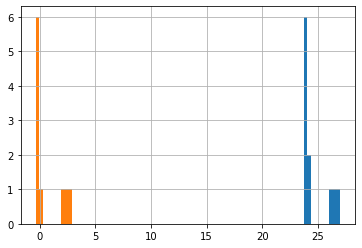

In [28]:
res_frame['mse'].hist()
res_frame['mse_diff'].hist()

## Summary

For each of the missing values we selected AGE as our target column for missing values. In every example we used the median age to impute, given the strong right skew in the histogram. In each imputation, we see a decrease in the mean squared error, with the greatest reduction appearing in the 25% not missing at random. This is likely due to how we removed the data: since we removed the 25% quartile of the values, we naturally skewed the age further to the right. Since our median remained the same, this likely normalized the variable and made the model more resilient. However, it is unclear if this is actually more "accurate" since the age would not be reflective of reality in this case.